# Machine Learning Project
## Supervised Learning
## Finding Donors for *CharityML*

This project is my first independent project using Machine Learning. This project is specifically focused on Supervised Learning and was part of the Udacity 'Introduction to Machine Learning with PyTorch' Nanodegree.

## What does this project do?

In this project, my task was to use supervised algorithms of my choice to model the income of people using data that had been collected from the 1994 U.S. Census. 

From doing this, I, then, had to use my findings to conclude on the best algorithm based on the preliminary results and optimise the algorithm to model the data further. From this, my aim was to construct a model that must accurately predict whether an individual makes more than $50,000.

From what I understood on the course, this is a common practice within many charity organisations that depend on donations from the public. This strategy helps to find suitable donors who earn a high enough income and are able to afford to donate. 

References:
[1]The dataset for this project originates from the [UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Census+Income).

----
## Exploring the Data

In [9]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [14]:
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income=='>50K'])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income=='<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records * 100.0

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


## ** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Data must be cleaned, formatted, and restructured before being used for Machine Learning algorithms — this is known as **preprocessing**. Preprocessing can help with the outcome and prediction power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset can sometimes have at least one feature wher the values lie near a single number, but will also have a non-trivial number of significant larger or smaller values than that single number.  ML Algorithms can be sensitive to these distributions of values and can underperform if the range is not normalized correctly. 

With the census dataset, two features fit this description: '`capital-gain'` and `'capital-loss'`. 

C:\Users\jenni\Documents\Learning\Udacity\DSND_Term1-master\projects\p1_charityml\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


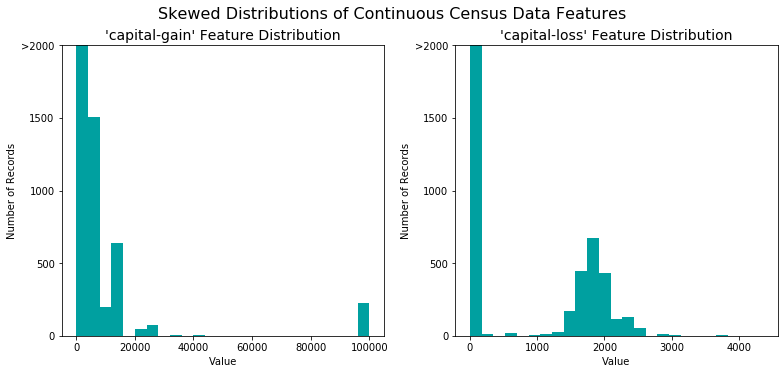

In [15]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

`'capital-gain'` and `'capital-loss'` have highly skewed distributions. When this happens, we need to apply a logarithmic transformation on the data. 

This is done so that the very large values and the very small value don't have a negative effect on the performance of a learning algorithm. Using this strategy helps reduce the range of values caused by outliers.

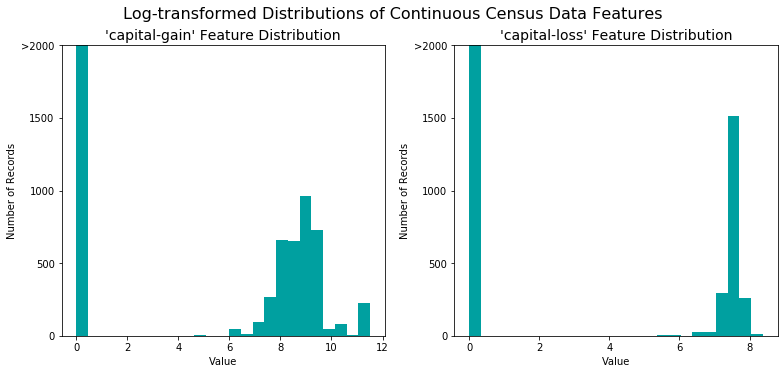

In [16]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features

Applying normalization ensures that each feature is treated equally when applying supervised learners. Scaling the data alone is not enough to change the shape of each feature's distribution. 

In [17]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table above, we can see there are features for each record that are non-numeric. Majority of the time, learning algorithms expect input to be numeric. To resolve this, non-numeric features will need to be converted into categorical variables. A popular way to convert categorical variables is by using **one-hot encoding**. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we have to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we won't need to use one-hot encoding and will encode these two categories as `0` and `1`, respectively.

In [18]:
# #One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_transformed)

# #Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

# #Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

features_final = pd.DataFrame(index = features_raw.index)

for col, col_data in features_raw.iteritems():
    if col_data.dtype == object:
        col_data = pd.get_dummies(col_data, prefix = col)  
        
    features_final = features_final.join(col_data)

#Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

#Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
The _categorical variables_ have now been converted into numerical features, and all numerical features have been normalized. From here, I will split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance

I will now use four different algorithms to determine which is best at modeling the data. Three of these algorithms will be supervised learners of my choice, and the fourth algorithm is known as a *naive predictor*.

### Question 1 - Naive Predictor Performace

The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. Ideally your base model would be either the results of a previous model or something else depending on what I'm trying to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

In [21]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

TP = np.sum(income)
FP = income.count() - TP

TN = 0
FN = 0

# Calculating accuracy, precision and recall
accuracy = TP/(TP+FP)
recall = TP/(TP+FN)
precision = accuracy

# Calculating F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2)*(precision * recall)/(beta**2*precision+recall)
                        
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models

**Note examples of Supervised Learning**

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application

List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen:

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

Ensure you structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

1.AdaBoost Classifier

a. Popularly used in hackathons and on data science competitions (i.e. Kaggle) 
b. Strengths of the model is that it is easy to use. It's not prone to overfitting and you can use multiple base classifiers with it. 
c. Weaknesses of the model is that it is highly sensitive to outliers because it tries to fit each data point perfectly. 
d. I feel that it would be useful because we are not running the model in real-time and the size of the model makes using Adaboost beneficial. 

2.Random Forest

a. Popularly used by Netflix in order to turn data into product features such as optimising recommendations for their users. Example: https://netflixtechblog.com/netflix-recommendations-beyond-the-5-stars-part-2-d9b96aa399f5
b. Strengths of the model is that it handles outliers by removing them completely and has methods for balancing errors in large unbalanced data sets.
c. Weaknesses - Prone to overfitting, performs poorly on testing data
d. Better for using on categorical variables and can train much better with the large amount of entries there is. 

3.Gaussian (Naive Bayes)

a. Popularly used by email service providers in detecting spam mail. 
b. Strengths of the model is that it is easy to implement on test data, it's fast and works well with large data sets. 
c. Weaknesses of the model is that it assumes that all features are independent from one another and that is not always the case so although it is fast, this is a consequence of that. 
d. Useful for the large number of features available after one-hot encoding.

### Implementation - Creating a Training and Predicting Pipeline

Here, I am evaluating the performance of each model I've chosen. It's important that I create a training and predicting pipeline that allows me effectively train models quickly using different sizes of training data and perform predictions on the testing data. 

In [24]:
# Importing two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return(results)

### Implementation: Initial Model Evaluation

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


C:\Users\jenni\Documents\Learning\Udacity\DSND_Term1-master\projects\p1_charityml\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


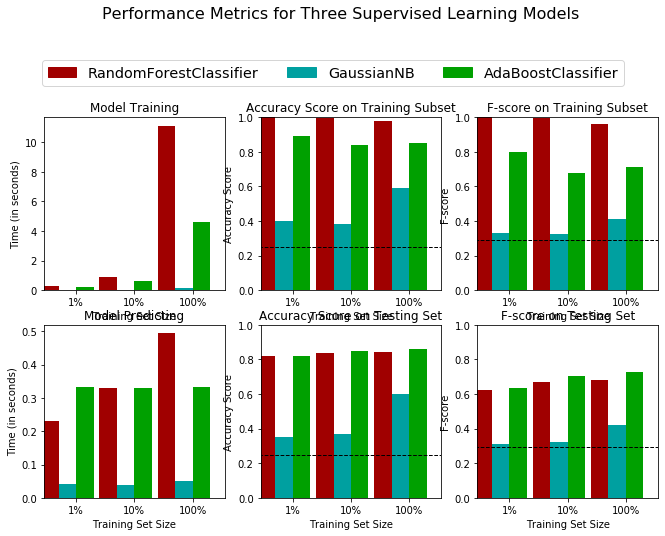

In [25]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models
clf_A = RandomForestClassifier(random_state=50)
clf_B = GaussianNB()
clf_C = AdaBoostClassifier(random_state=50)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Collecting results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

#Visualise
vs.evaluate(results, accuracy, fscore)

## Improving Results

In this final section, I will choose from the three supervised learning models and select what I believe to be the *best* model to use on the student data. I will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**Answer:**

I would choose the AdaBoost model. The reasons being that it, firstly, resulted in a great F score on the testing data even when 100% of the training data is used compared to the other models.

The F-Score measures the test's accuracy & precision and this is just over 0.8 for AdaBoost with 100% of the training set, when the F-Score is equal to 0.70.

AdaBoost is significantly slower with 100% of the Model Training compared to RandomForest and SVM however seeing as we are not using the model on a real-time application, it's more important for it to be predicting as accurately as possible which is more important than speed.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. 

**Answer:** 

The AdaBoost is the final model. It combines the weak learners to form a strong rule. We start with the base learner, it takes all the distributions then assigns equal weight to each observation.

If a prediction error is created by the first base algorithm, then we focus on the observations that are having prediction errors. We, then, apply the next base learning algorithm. We keep reiterating this until the limit of the base learning algorithm is met or a higher accuracy is achieved.

After this is done, we combine the outputs from weak learners to create a strong learner. This will improve the prediction power of the model.

The Boosting helps brings focus to the mis-classified points and those that have higher errors by preceding weak rules.

### Implementation: Model Tuning

In this section, I will fine tune the chosen model. I will use grid search (`GridSearchCV`) with at least one important parameter that will be tuned with at least 3 different values.

In [26]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(random_state=50)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'n_estimators': [20, 40],
              'learning_rate': [0.01, 0.1],
              'algorithm': ['SAMME', 'SAMME.R']

}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.7246

Optimized Model
------
Final accuracy score on the testing data: 0.8421
Final F-score on the testing data: 0.6979


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8576         |    0.8421       |
| F-score        |    0.7246         |    0.6979       |


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**Answer: **

The results of the Unoptimised Models are better than the Optimised Model. It's a significantly better result than what was found earlier: Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]

----
## Feature Importance

Here is an important task when performing supervised learning on a dataset like the census data I have been using for this project. I have to determine which features provide the most predictive power. I will do this by focusing on the relationship between a few crucial features and the target label. To further explain, this means that I want to identify a small number of features that most strongly predict whether someone's salary is at or above $50,000. 

Here I will choose a scikit-learn classifier that has a `feature_importance_` attribute. This is a function that ranks the importance of features according to the chosen classifier.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

I would say:

capital-gain - This is the most important measure to determine the entries that earn the most income. capital-loss - This determines the entries that has the most total loss. education-num - Gives insight into their education status. The more educated they are, the more money they make. occupation - the amount they make is dependent on the industry they are in. age - the older you are, the more money you tend to make. With age comes experience.

### Implementation - Extracting Feature Importance

Here, I will choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute available for use. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

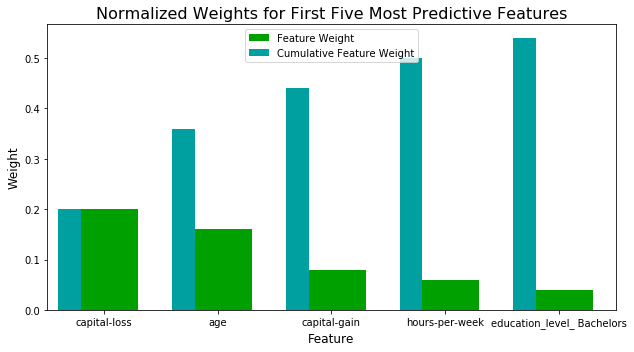

In [28]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier().fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

Aside from occupation, the five features were close to what I predicted. I guess the industry doesn't really have as much of an impact as I thought.

### Feature Selection

From the visualization above, I can see that the top five most important features contribute more than half of the importance of **all** features present in the data. This shows that we can attempt to *reduce the feature space* and simplify the information required for the model to learn.

In [29]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8421
F-score on testing data: 0.6979

Final Model trained on reduced data
------
Accuracy on testing data: 0.8087
F-score on testing data: 0.5806


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The final model's F-score and accuracy on the reduced data are lower than the model including all the features. It went down from 0.8421 to 0.8087 for the accuracy and 0.6979 to 0.5806 for F-score. If it was a real time application, I would consider the model on the reduced data. However, in the case of CharityML because the F-score has decreased, I would use the model built based on the entire dataset.

In [30]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 481384 bytes to finding_donors.html']